Dataset:

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/download

### Import Libraries

In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.data import ImageDataLoaders, imagenet_stats
from fastai.vision.augment import aug_transforms, Normalize
from fastai.vision.learner import cnn_learner, models, accuracy
from fastai.vision.all import *
import os
import pandas as pd
import numpy as np
from pathlib import Path

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now we need to set up the path for training dataset as the dataset includes images only:

In [2]:
x = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
path = Path(x)
path.ls()

(#2) [Path('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL')]

let's load the data

In [3]:
np.random.seed(40)

# Create the ImageDataLoaders object with augmentation and normalization
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                   item_tfms=Resize(460),
                                   batch_tfms=[*aug_transforms(flip_vert=True, max_zoom=1.0),
                                               Normalize.from_stats(*imagenet_stats)],
                                   size=224, num_workers=4)

### Data Exploration



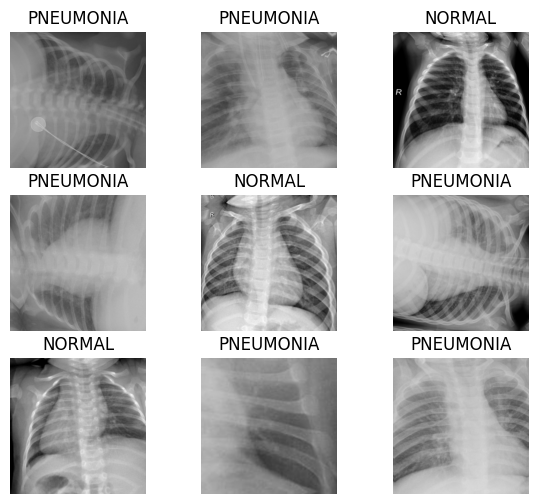

In [4]:
data.show_batch(nrows=3, ncols=3, figsize=(7,6))

### ResNet50 pretrained Model

In [5]:
n_out = 2

learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir=Path('Path'), path=Path("."), n_out=n_out)


/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

In [7]:
from fastai.vision.all import *

# Define the number of output classes
n_out = 2

# Create a DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

# Create a DataLoader
dls = dblock.dataloaders('/kaggle/input/chest-xray-pneumonia/chest_xray/train/')

# Create the learner
learn = cnn_learner(dls, resnet50, metrics=[accuracy], model_dir=Path('Path'), n_out=n_out)

# Train the model
learn.fine_tune(4)


epoch,train_loss,valid_loss,accuracy,time
0,0.462754,0.404148,0.917546,03:35


epoch,train_loss,valid_loss,accuracy,time
0,0.193473,0.339183,0.938639,03:21
1,0.131826,0.116262,0.971237,03:27
2,0.097404,0.114747,0.976031,03:29
3,0.067308,0.088637,0.974113,03:28


Now let’s have a look at the learning rate of the model:

SuggestedLRs(valley=7.585775892948732e-05)

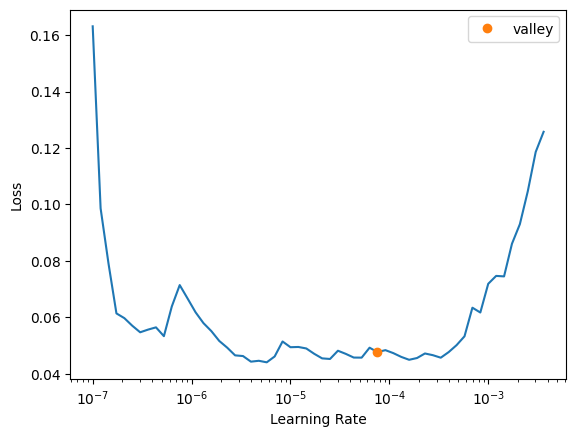

In [9]:
learn.lr_find()

### Training and Testing the Model

In the above section, we loaded the model. Now I will train the model on our dataset:

In [21]:
# lr1 = 1e-3
# lr2 = 7.58e-5
# learn.fit_one_cycle(4,slice(lr1,lr2))

Now let’s test the model:

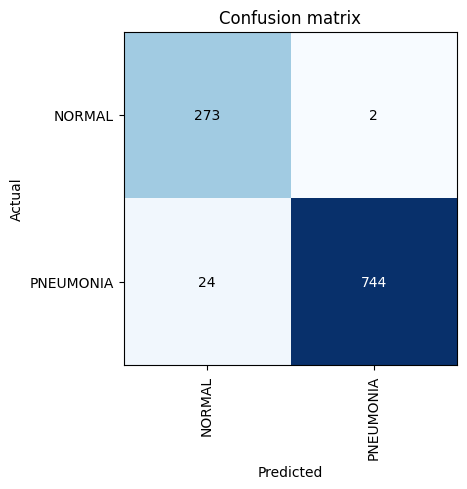

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
from PIL import Image
from fastai.vision.all import *

# Replace '/path/to/your/image.jpg' with the actual path to your image
image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'
img = load_image(image_path)
print(learn.predict(img)[0])


PNEUMONIA


Source:

https://thecleverprogrammer.com/2020/11/22/pneumonia-detection-with-python/